In [3]:
import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
import ast
import json
import tarfile

In [4]:
visitors = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/All_stores_total_visitors_2018.csv').drop(
    columns = ['Unnamed: 0','total_visitors'], axis =1)
location = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/all_info_after_aggregation.csv').drop(
    columns = ['Unnamed: 0'], axis =1)

In [5]:
location['longitude'] = location['geo'].apply(lambda x:ast.literal_eval(x)[1])
location['latitude'] = location['geo'].apply(lambda x:ast.literal_eval(x)[0])
geometry = [Point(xy) for xy in zip(location.longitude, location.latitude)]
location = location.drop(['longitude', 'latitude','geo'], axis=1)
location = GeoDataFrame(location, crs="EPSG:4326", geometry=geometry)

In [6]:
location

,safegraph_place_id,area_square_feet,geometry
0,sg:81aae721ea114787a6e105b349eeb400,19853,POINT (-73.96154 40.76816)
1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,68087,POINT (-73.83373 40.78377)
2,sg:72ea28e3e1a54cc0849b69121b98e1cd,126053,POINT (-73.97649 40.68465)
3,sg:084ab2c726784ab490b72144d44d4ee8,40818,POINT (-73.94674 40.63137)
4,sg:eb96ed984b274a57ae29762d73738d99,18706,POINT (-73.95947 40.60766)
...,...,...,...
280,sg:84a8615ac25b455bb1d01ec4c93cdd1f,96668,POINT (-74.16537 40.58328)
281,sg:ede0c3b8b3a143848181ee2430390072,5885,POINT (-73.90832 40.65925)
282,aggregated_517E,169356,POINT (-73.93101 40.79541)
283,aggregated_4024_College,214735,POINT (-73.83474 40.75775)


In [7]:
info_dict = {}
for i,cont in location.iterrows():
    info_dict[cont['safegraph_place_id']] = cont['geometry']

In [8]:
with open('/Volumes/xuyilun/课题/Human Dynamics/safegraph/nyc_cbgs.json') as f:
    cbg_data = json.load(f)
cbg_info = cbg_data['features']
cbgs = visitors.cbg.tolist()

In [9]:
shp_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/tl_2017_36_bg/tl_2017_36_bg.shp'

In [10]:
shp_df = geopandas.GeoDataFrame.from_file(shp_path,encoding = 'gb18030')
#shp_df = shp_df[shp_df['GEOID'].isin(nyc_cbg)].reset_index()

In [11]:
cbg_info = {}
cbg_id = shp_df['GEOID'].tolist()
cbg_geo = shp_df['geometry'].tolist()
for i in range(len(cbg_id)):
    cbg_info[cbg_id[i]] = cbg_geo[i]

In [12]:
visitors

,cbg,sg:51c8d943ff72400ab86e7e8896f4b5af,sg:f189f91419974d03a20257132d73da58,sg:c7222887b3834a58a6bc40c168cdb38a,sg:e2543bebe82742a1941c21660d9f4168,sg:3275834c58d241baacdb9965f5003af6,sg:81aae721ea114787a6e105b349eeb400,sg:cffe77a3b2f543af9387cdc0a69cb0b8,sg:4c2a6e828527407d863fc641eaa20ac3,sg:084ab2c726784ab490b72144d44d4ee8,...,sg:a61e1c7be39f4294824e1bd68483fb03,sg:0031a04b56d64aecab115f342a98234b,sg:7f1fde9fd68b47899bfab9cd5f0071df,sg:8d376e7211074b6f8da481353e0a4627,sg:0d9fe727bf634df3b1f5c9f7460f75e4,sg:29b14793c6a54fe69540bddefc24042e,sg:187d4b6602c845c3bfede20a1deeb8d1,sg:90a04f3d29784b84ad73e55909e864f8,sg:10efeb7c06ac4940a3d4e996c0ce5476,sg:c38f81e7fe2b4b48a6e258824983b741
0,360050001000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,360050001001,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,360050002000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,360050002001,0,0,0,0,0,4,0,0,0,...,0,0,0,0,4,0,0,0,0,0
4,360050002002,8,0,0,0,16,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,360850319022,0,0,4,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
6489,360850319023,0,0,4,0,0,0,4,0,0,...,0,0,4,0,6,0,0,0,0,0
6490,360850323000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6491,360850323001,0,0,0,0,0,0,12,0,0,...,0,4,8,0,0,0,0,0,0,0


In [13]:
visitors['cbg_geometry'] = visitors['cbg'].apply(lambda x: cbg_info[str(x)])

In [14]:
visitors

,cbg,sg:51c8d943ff72400ab86e7e8896f4b5af,sg:f189f91419974d03a20257132d73da58,sg:c7222887b3834a58a6bc40c168cdb38a,sg:e2543bebe82742a1941c21660d9f4168,sg:3275834c58d241baacdb9965f5003af6,sg:81aae721ea114787a6e105b349eeb400,sg:cffe77a3b2f543af9387cdc0a69cb0b8,sg:4c2a6e828527407d863fc641eaa20ac3,sg:084ab2c726784ab490b72144d44d4ee8,...,sg:0031a04b56d64aecab115f342a98234b,sg:7f1fde9fd68b47899bfab9cd5f0071df,sg:8d376e7211074b6f8da481353e0a4627,sg:0d9fe727bf634df3b1f5c9f7460f75e4,sg:29b14793c6a54fe69540bddefc24042e,sg:187d4b6602c845c3bfede20a1deeb8d1,sg:90a04f3d29784b84ad73e55909e864f8,sg:10efeb7c06ac4940a3d4e996c0ce5476,sg:c38f81e7fe2b4b48a6e258824983b741,cbg_geometry
0,360050001000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-73.897722 40.795138, -73.8961099999..."
1,360050001001,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-73.892656 40.793824, -73.891936 40...."
2,360050002000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-73.866484 40.805901, -73.8623099999..."
3,360050002001,0,0,0,0,0,4,0,0,0,...,0,0,0,4,0,0,0,0,0,"POLYGON ((-73.86332899999999 40.814782, -73.86..."
4,360050002002,8,0,0,0,16,0,0,0,0,...,4,0,0,0,0,0,0,0,0,"POLYGON ((-73.865218 40.814529, -73.864255 40...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,360850319022,0,0,4,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-74.171216 40.637436, -74.169693 40...."
6489,360850319023,0,0,4,0,0,0,4,0,0,...,0,4,0,6,0,0,0,0,0,POLYGON ((-74.16618699999999 40.63585399999999...
6490,360850323000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-74.19709399999999 40.635737, -74.19..."
6491,360850323001,0,0,0,0,0,0,12,0,0,...,4,8,0,0,0,0,0,0,0,"POLYGON ((-74.19592299999999 40.635224, -74.19..."


In [17]:
target_df = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/Target_total_visitors_2018.csv')

In [24]:
base_targets = target_df.columns[2:-1].tolist()

In [26]:
temp_3_targets

,safegraph_place_id,area_square_feet,geometry
0,sg:81aae721ea114787a6e105b349eeb400,19853,POINT (-73.96154 40.76816)
1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,68087,POINT (-73.83373 40.78377)
3,sg:084ab2c726784ab490b72144d44d4ee8,40818,POINT (-73.94674 40.63137)
4,sg:eb96ed984b274a57ae29762d73738d99,18706,POINT (-73.95947 40.60766)
5,sg:5fe86b949ad24e79b59672ae1b6d148d,39355,POINT (-74.01115 40.71467)
6,sg:7a48b2cf2a904e9ebbdef801d0576c4d,151960,POINT (-74.16690 40.57472)
7,sg:cffe77a3b2f543af9387cdc0a69cb0b8,150619,POINT (-74.23253 40.52864)
8,sg:fd4bf1e165794ab99140ca0bb2d5e022,28280,POINT (-73.98692 40.71621)
9,sg:268ea7486c334ad8ad2d0e4e08f3ff9e,20923,POINT (-73.98289 40.69138)
10,sg:e2543bebe82742a1941c21660d9f4168,30554,POINT (-73.97972 40.72979)


In [28]:
base_targets = ['sg:c843f07483c04a22960814f2d859ec04','sg:84898e686e71419b805d5212ae814111','sg:cffe77a3b2f543af9387cdc0a69cb0b8']

In [29]:
temp_3_targets = location[location['safegraph_place_id'].isin(base_targets)]
temp_3_targets['text'] = ['Diversity based','Revenue based','PSO based']

In [33]:
def get_image(store):
    p = GeoDataFrame(visitors[['cbg',store,'cbg_geometry']],geometry = 'cbg_geometry')
    fig, ax = plt.subplots(1, 1, figsize=[15,10])
    base = p.plot(column = store,legend = True,ax=ax,
                  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange"]),edgecolor='black',linewidth=0.2)
    temp_1_target = temp_3_targets[temp_3_targets['safegraph_place_id'] == store]
    temp_1_target.plot(ax=ax,marker='*', color = 'blue', markersize=30,label='Target')
    plt.suptitle('Number of Visitors in 2018',size = 20)
    plt.title(store,size = 12, pad=20, loc='center')
    for x, y, label,text in zip(temp_1_target.geometry.x, temp_1_target.geometry.y, temp_1_target.safegraph_place_id, temp_1_target.text):
        string = 'Closed Store ('+ text +')'
        ax.annotate(string, xy=(x, y), xytext=(3, 3), textcoords="offset points", size = 10)
    plt.axis('off')
    save_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/figures/Suggested_closed_stores/'+store[3:]+'_2018.png'
    plt.savefig(save_path,dpi=100)
    #plt.show()
    #return fig

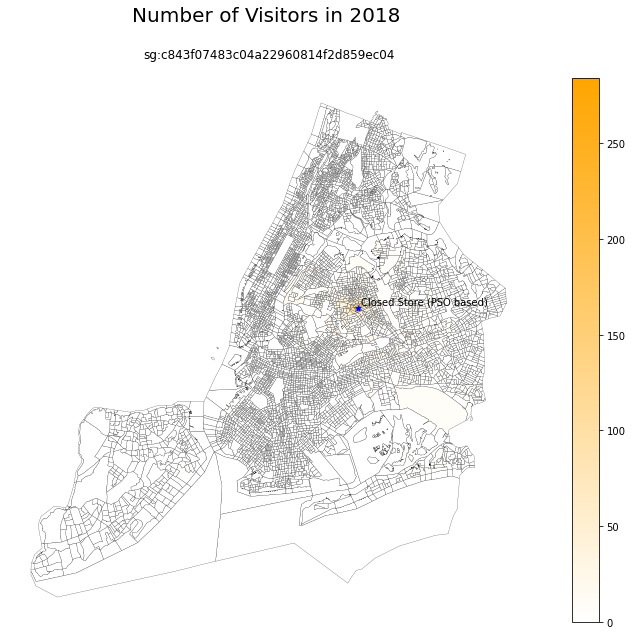

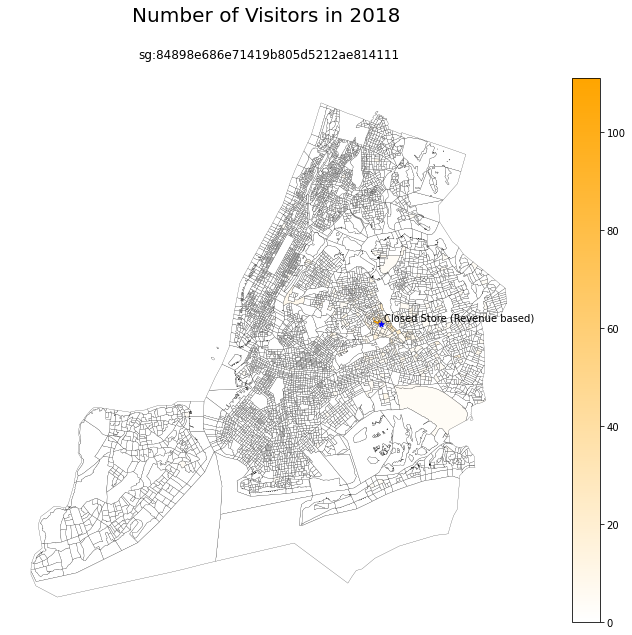

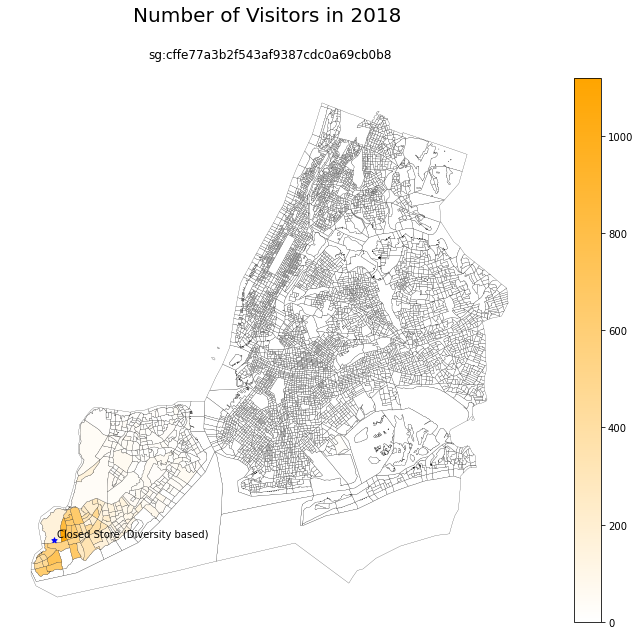

In [34]:
base_targets = ['sg:c843f07483c04a22960814f2d859ec04','sg:84898e686e71419b805d5212ae814111','sg:cffe77a3b2f543af9387cdc0a69cb0b8']
for t in base_targets:
    get_image(t)

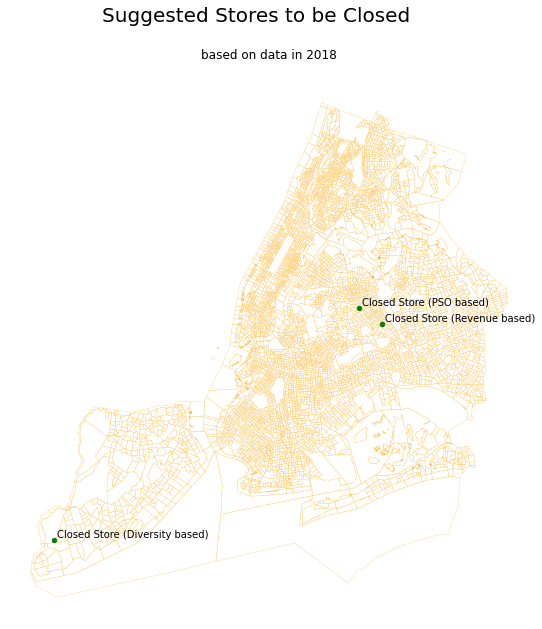

In [35]:
p = GeoDataFrame(visitors,geometry = 'cbg_geometry')
fig, ax = plt.subplots(1, 1, figsize=[15,10])
p.plot(ax=ax, color='white', edgecolor='orange',linewidth=0.2)
temp_3_targets.plot(ax=ax, marker='o', color = 'green', markersize=20)
for x, y, label,text in zip(temp_3_targets.geometry.x, temp_3_targets.geometry.y, temp_3_targets.safegraph_place_id, temp_3_targets.text):
    string = 'Closed Store ('+ text +')'
    ax.annotate(string, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.suptitle('Suggested Stores to be Closed',size = 20)
plt.title('based on data in 2018',size = 12, pad=20, loc='center')
plt.axis('off')
save_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/figures/Suggested_closed_stores/Suggested_Stores_to_be_Closed_2018.png'
plt.savefig(save_path,dpi=100)

## customer demographics

In [38]:
def get_data(path, col):
    temp = pd.read_csv(path)
    temp = temp[temp['census_block_group'].isin(cbgs)]
    cols = ['census_block_group']
    cols.extend(col)
    temp = temp[cols]
    temp = temp.fillna(0)
    temp['cbg_geometry'] = temp['census_block_group'].apply(lambda x: cbg_info[str(x)])
    temp = GeoDataFrame(temp, geometry = 'cbg_geometry')    
    return temp

In [36]:
income = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/census data/safegraph_open_census_data/data/cbg_b19.csv'
population = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/census data/safegraph_open_census_data/data/cbg_b25.csv'

In [ ]:
income_df = get_data(income,['B19049e1','B19049m1'])
pop_df = get_data(population, ['B25033e1','B25033m1'])

In [ ]:
income_df

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[15,10])
base = income_df.plot(column = 'B19049e1',legend = True,ax=ax,
                      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange"]), edgecolor='black',linewidth=0.2)
temp_3_targets.plot(ax=ax, marker='o', color = 'green', markersize=20)
for x, y, label,text in zip(temp_3_targets.geometry.x, temp_3_targets.geometry.y, temp_3_targets.safegraph_place_id, temp_3_targets.text):
    string = 'Closed Store ('+ text +')'
    ax.annotate(string, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.suptitle('Median Household Income In The Past 12 Months',size = 20)
plt.title('Estimate',size = 12, pad=20, loc='center')
plt.axis('off')
save_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/figures/Customer_demographics/Income_Estimate.png'
plt.savefig(save_path,dpi=100)

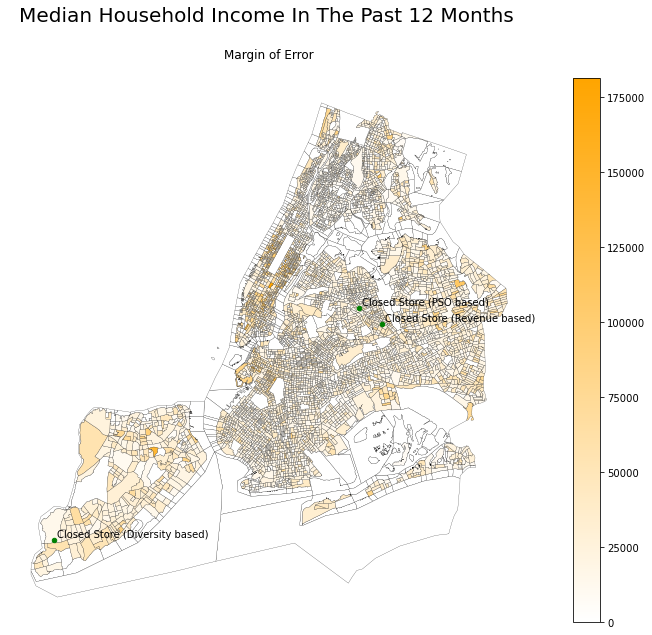

In [124]:
fig, ax = plt.subplots(1, 1, figsize=[15,10])
base = income_df.plot(column = 'B19049m1',legend = True,ax=ax,
              cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange"]),edgecolor='black',linewidth=0.2)
temp_3_targets.plot(ax=ax, marker='o', color = 'green', markersize=20)
for x, y, label,text in zip(temp_3_targets.geometry.x, temp_3_targets.geometry.y, temp_3_targets.safegraph_place_id, temp_3_targets.text):
    string = 'Closed Store ('+ text +')'
    ax.annotate(string, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.suptitle('Median Household Income In The Past 12 Months',size = 20)
plt.title('Margin of Error',size = 12, pad=20, loc='center')
plt.axis('off')
save_path = r'F:\课题\Human Dynamics\safegraph\PSO\figures\Income_Margin_of_Error.png'
plt.savefig(save_path,dpi=800)

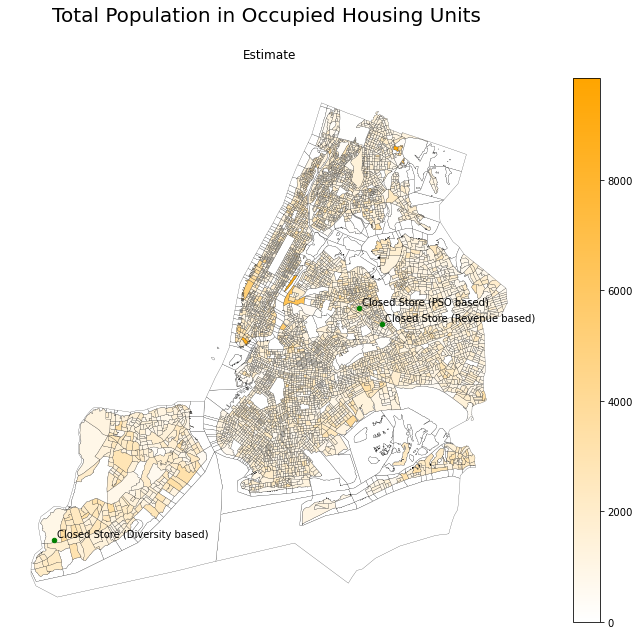

In [125]:
fig, ax = plt.subplots(1, 1, figsize=[15,10])
base = pop_df.plot(column = 'B25033e1',legend = True,ax=ax,
              cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange"]),edgecolor='black',linewidth=0.2)
temp_3_targets.plot(ax=ax, marker='o', color = 'green', markersize=20)
for x, y, label,text in zip(temp_3_targets.geometry.x, temp_3_targets.geometry.y, temp_3_targets.safegraph_place_id, temp_3_targets.text):
    string = 'Closed Store ('+ text +')'
    ax.annotate(string, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.suptitle('Total Population in Occupied Housing Units',size = 20)
plt.title('Estimate',size = 12, pad=20, loc='center')
plt.axis('off')
save_path = r'F:\课题\Human Dynamics\safegraph\PSO\figures\Population_Estimate.png'
plt.savefig(save_path,dpi=800)

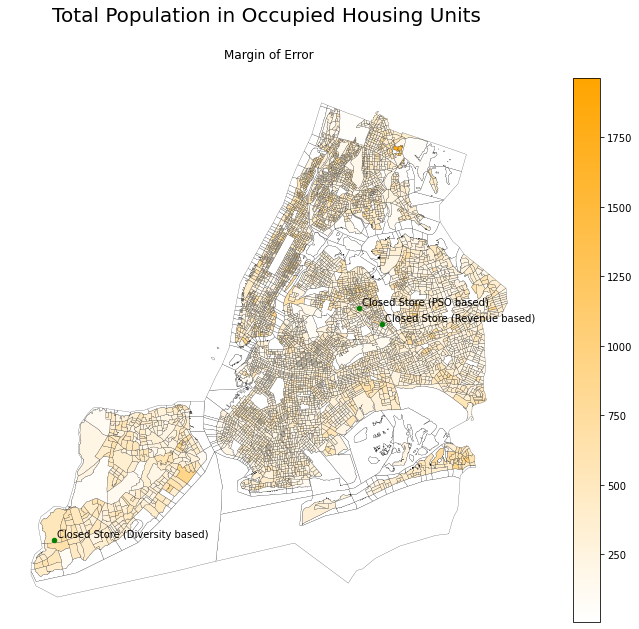

In [126]:
fig, ax = plt.subplots(1, 1, figsize=[15,10])
base = pop_df.plot(column = 'B25033m1',legend = True,ax=ax,
              cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange"]),edgecolor='black',linewidth=0.2)
temp_3_targets.plot(ax=ax, marker='o', color = 'green', markersize=20)
for x, y, label,text in zip(temp_3_targets.geometry.x, temp_3_targets.geometry.y, temp_3_targets.safegraph_place_id, temp_3_targets.text):
    string = 'Closed Store ('+ text +')'
    ax.annotate(string, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.suptitle('Total Population in Occupied Housing Units',size = 20)
plt.title('Margin of Error',size = 12, pad=20, loc='center')
plt.axis('off')
save_path = r'F:\课题\Human Dynamics\safegraph\PSO\figures\Population_Margin_of_Error.png'
plt.savefig(save_path,dpi=800)